In [7]:
import autograd.numpy as np
import autograd.numpy.random as npr
import os
import glob
import scipy.io
import numpy as np2
import matplotlib.pyplot as plt
import pickle
npr.seed(0)

import ssm
import smartload.smartload as smart
from src.exputils import load_multiple_sessions, make_savedict
import src.blockhmm_validation as bval
from src.utils import pathsetup
npr.seed(0)

%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
# Setup evaluation parameters
nstates_lst=np.arange(1, 9)
N_iters=3000
frac_train=0.8

In [13]:
files

['/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/fh03_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/f16_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/f21_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/f12_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/f04_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/e56_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/e35_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/122221b/f01_all_sessions_122221b.mat',
 '/Users/minhnhatle/Dropbox (MIT)/Sur/M

In [19]:
version='122221b'
filepath = f'/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/{version}'
files = glob.glob(filepath + '/*.mat')
filenames = [item.split('/')[-1] for item in files if 'all_sessions' in item]
animal_lst = [file.split('_')[0] for file in filenames]

params = dict(nstates_lst=np.arange(1, 9),
                  N_iters=3000,
                  frac_train=0.8,
                 version='122221b',
             fitrangefile='/Users/minhnhatle/Dropbox (MIT)/Sur/MatchingSimulations/processed_data/expdata/102121/fitranges_122221.mat')

ll_lst_all = []
test_lens = []
for animal in animal_lst:
    print(f'Analyzing animal {animal}')
    ll_lst, nstates_lst, obs_train, obs_test = bval.run_and_validate(animal, 123, params)
    test_lens.append(obs_test.shape[0])
    ll_lst_all.append(ll_lst)

Analyzing animal fh03
Starting run and save for fh03, seed 123


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.9420804471420943


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.299206097816856


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.4575194423248394


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.443318519993795


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.6171342566458202


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.6424730304115194


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.3556043483204347


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.3665715833728114
[1 2 3 4 5 6 7 8]
[0.9420804471420943, 2.299206097816856, 2.4575194423248394, 2.443318519993795, 2.6171342566458202, 2.6424730304115194, 2.3556043483204347, 2.3665715833728114]
Analyzing animal f16
Starting run and save for f16, seed 123


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.358037653441737


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.7761052280093725


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.7026978963350228


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.8998025758740558


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.7810231170573956


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.7894013415824146


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.284807331394256


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.8093128788237003
[1 2 3 4 5 6 7 8]
[1.358037653441737, 2.7761052280093725, 2.7026978963350228, 2.8998025758740558, 2.7810231170573956, 2.7894013415824146, 2.284807331394256, 2.8093128788237003]
Analyzing animal f21
Starting run and save for f21, seed 123


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.5001729824442789


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.9097668944288908


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2457993413702884


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.158188905539196


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.1512986480160063


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.001066875256743


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.0243952358850144


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.0819536138098496
[1 2 3 4 5 6 7 8]
[1.5001729824442789, 1.9097668944288908, 2.2457993413702884, 2.158188905539196, 2.1512986480160063, 2.001066875256743, 2.0243952358850144, 2.0819536138098496]
Analyzing animal f12
Starting run and save for f12, seed 123


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.3869940995505285


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.2173175487468435


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2863288373274346


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.3730188647735067


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.382401682713063


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.5475783516390003


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.451959079579047


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.416397047770699
[1 2 3 4 5 6 7 8]
[1.3869940995505285, 2.2173175487468435, 2.2863288373274346, 2.3730188647735067, 2.382401682713063, 2.5475783516390003, 2.451959079579047, 2.416397047770699]
Analyzing animal f04
Starting run and save for f04, seed 123


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.22313780835797323


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.2622054766255245


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.28450240833574375


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.6450873466025212


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.3152074404813119


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.6189203677848701


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.6293332856618493


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.5075750494975126
[1 2 3 4 5 6 7 8]
[0.22313780835797323, 0.2622054766255245, 0.28450240833574375, 0.6450873466025212, 0.3152074404813119, 0.6189203677848701, 0.6293332856618493, 0.5075750494975126]
Analyzing animal e56
Starting run and save for e56, seed 123


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.5088429310629347


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.1975120378046917


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.41913069586003


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.7220663197229749


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.4986282673860807


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.6546307140521235


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.4759652518200965


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.423970781100653
[1 2 3 4 5 6 7 8]
[0.5088429310629347, 1.1975120378046917, 1.41913069586003, 1.7220663197229749, 1.4986282673860807, 1.6546307140521235, 1.4759652518200965, 1.423970781100653]
Analyzing animal e35
Starting run and save for e35, seed 123


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.5637242426498021


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.9434439784893485


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2432786310923385


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.2266328270511013


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.229864471990279


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.1076885539714394


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.1949515321791377


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.089159337156458
[1 2 3 4 5 6 7 8]
[0.5637242426498021, 1.9434439784893485, 2.2432786310923385, 2.2266328270511013, 2.229864471990279, 2.1076885539714394, 2.1949515321791377, 2.089159337156458]
Analyzing animal f01
Starting run and save for f01, seed 123


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.8925319954041948


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.1079195498296253


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.158734950971875


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.247157381316566


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.3760421829599716


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.3013547431645396


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.4470584876375368


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.4190666758279793
[1 2 3 4 5 6 7 8]
[0.8925319954041948, 2.1079195498296253, 2.158734950971875, 2.247157381316566, 2.3760421829599716, 2.3013547431645396, 2.4470584876375368, 2.4190666758279793]
Analyzing animal e57
Starting run and save for e57, seed 123


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.14002546831637405


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.5045453725820392


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.6023013018674351


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.6001023917598461


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.6212201976819491


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.5751889142800253


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.4693770767663598


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.45948424329044196
[1 2 3 4 5 6 7 8]
[0.14002546831637405, 0.5045453725820392, 0.6023013018674351, 0.6001023917598461, 0.6212201976819491, 0.5751889142800253, 0.4693770767663598, 0.45948424329044196]
Analyzing animal e53
Starting run and save for e53, seed 123


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = -0.004477824922353712


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.3026359406473613


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.26856780647158923


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.2641486909267409


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.25536873944490623


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.2660239671802483


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.25327319295357137


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.24336835645148022
[1 2 3 4 5 6 7 8]
[-0.004477824922353712, 0.3026359406473613, 0.26856780647158923, 0.2641486909267409, 0.25536873944490623, 0.2660239671802483, 0.25327319295357137, 0.24336835645148022]
Analyzing animal fh02
Starting run and save for fh02, seed 123


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.9042192441949368


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.0608335793378925


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2308371302345886


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.185503768724014


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.2974808310035706


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.128068447141158


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.015058973976354


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.0929023255492587
[1 2 3 4 5 6 7 8]
[0.9042192441949368, 2.0608335793378925, 2.2308371302345886, 2.185503768724014, 2.2974808310035706, 2.128068447141158, 2.015058973976354, 2.0929023255492587]
Analyzing animal f17
Starting run and save for f17, seed 123


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.2399742098071922


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.5660011658696122


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.538738766470204


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.2223334669571355


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.3797239222776145


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.2285779892376896


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.4241460447175696


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.0849546458094155
[1 2 3 4 5 6 7 8]
[1.2399742098071922, 2.5660011658696122, 2.538738766470204, 2.2223334669571355, 2.3797239222776145, 2.2285779892376896, 2.4241460447175696, 2.0849546458094155]
Analyzing animal f20
Starting run and save for f20, seed 123


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.630631326547848


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.3757536489957978


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.3635847252517217


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.3065795323449372


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.579777556944339


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.3338081407281044


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.4220618500415572


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.501814342370784
[1 2 3 4 5 6 7 8]
[0.630631326547848, 1.3757536489957978, 1.3635847252517217, 1.3065795323449372, 1.579777556944339, 1.3338081407281044, 1.4220618500415572, 1.501814342370784]
Analyzing animal f03
Starting run and save for f03, seed 123


  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.16702723711645195


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.5051098745263607


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.6245458261672463


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.6342696313980712


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.6309889444281076


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.5977576996762045


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.6395925037203871


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.6541517181668663
[1 2 3 4 5 6 7 8]
[0.16702723711645195, 0.5051098745263607, 0.6245458261672463, 0.6342696313980712, 0.6309889444281076, 0.5977576996762045, 0.6395925037203871, 0.6541517181668663]
Analyzing animal f22
Starting run and save for f22, seed 123


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = -0.08395703319732163


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.383909039234292


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.42090718325176074


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.7147346178450624


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.7234644897840377


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.7213783758387355


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.7217491656923345


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.718045324403843
[1 2 3 4 5 6 7 8]
[-0.08395703319732163, 0.383909039234292, 0.42090718325176074, 1.7147346178450624, 1.7234644897840377, 1.7213783758387355, 1.7217491656923345, 1.718045324403843]
Analyzing animal f11
Starting run and save for f11, seed 123


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.9797755269456


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.308616160374765


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.4442233181171105


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.452003668222817


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.517175933543529


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.426972041404574


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.502388663444835


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.4020268213037737
[1 2 3 4 5 6 7 8]
[0.9797755269456, 2.308616160374765, 2.4442233181171105, 2.452003668222817, 2.517175933543529, 2.426972041404574, 2.502388663444835, 2.4020268213037737]
Analyzing animal e46
Starting run and save for e46, seed 123


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.1344836374082479


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.600962175714001


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.7848085922395827


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.8288008412289725


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.687170297589672


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.647881534173325


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.6744332083446536


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.624801185517209
[1 2 3 4 5 6 7 8]
[1.1344836374082479, 2.600962175714001, 2.7848085922395827, 2.8288008412289725, 2.687170297589672, 2.647881534173325, 2.6744332083446536, 2.624801185517209]
Analyzing animal f23
Starting run and save for f23, seed 123


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = -0.1407927334151032


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.012382906241042284


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = -0.14907106841052045


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = -0.15205788052398933


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = -0.32176232800605065


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = -0.07458571920009716


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = -0.21097228965176745


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.034473597584919705
[1 2 3 4 5 6 7 8]
[-0.1407927334151032, 0.012382906241042284, -0.14907106841052045, -0.15205788052398933, -0.32176232800605065, -0.07458571920009716, -0.21097228965176745, 0.034473597584919705]
Analyzing animal fh01
Starting run and save for fh01, seed 123


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.081730770744243


  0%|          | 0/3000 [00:00<?, ?it/s]

/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Num states = 2, likelihood = 2.0111267239780304


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.507456890442614


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.355045140567718


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.6263535663066488


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.78673107117049


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.5537192326469307


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.779144576789108
[1 2 3 4 5 6 7 8]
[1.081730770744243, 2.0111267239780304, 1.507456890442614, 2.355045140567718, 1.6263535663066488, 1.78673107117049, 1.5537192326469307, 1.779144576789108]
Analyzing animal f02
Starting run and save for f02, seed 123


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.3909300784785424


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.2402315842971199


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.4803899718103453


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.4687039383791678


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.340771405466815


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.502715619916728


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.3987838254471734


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.3499165895814766
[1 2 3 4 5 6 7 8]
[0.3909300784785424, 1.2402315842971199, 1.4803899718103453, 1.4687039383791678, 1.340771405466815, 1.502715619916728, 1.3987838254471734, 1.3499165895814766]
Analyzing animal e54
Starting run and save for e54, seed 123


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.3371091222817109


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.3302423530242051


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.4414842177862779


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.4423304321326071


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.4233883704617636


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.4040314102575395


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.408179312181718


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.4289448628482493
[1 2 3 4 5 6 7 8]
[0.3371091222817109, 1.3302423530242051, 1.4414842177862779, 1.4423304321326071, 1.4233883704617636, 1.4040314102575395, 1.408179312181718, 1.4289448628482493]


5
3
2
5
3
3
2
6
2
1
2
1
4
2
3
4
3
1
3
2
2


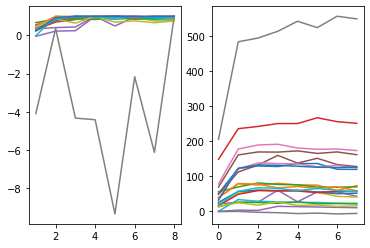

In [20]:
aic_lst = []
for i in range(len(ll_lst_all)):
    plt.subplot(121)
    idmax = np.argmax(ll_lst_all[i])
    plt.plot(np.arange(1, 9), ll_lst_all[i] / max(ll_lst_all[i]))
    aic = np.array(ll_lst_all[i]) * test_lens[i] * np.log(2) - np.arange(1, 9)
    plt.subplot(122)
    aic_lst.append(aic)
    plt.plot(aic)
    print(np.argmax(aic))

In [21]:
pickle.dump(dict(animal_lst=animal_lst,
                ll_lst_all=ll_lst_all,
                params=params,
                 aic_lst=aic_lst,
                seed=123), open('blockhmm_validation_021222.pkl', "wb" ))




In [24]:
# Load the saved pkl file
version = '021222'
paths = pathsetup('matchingsim')
rootdir = f"{paths['blockhmmfitpath']}/K_selection/"
savedfilepath = rootdir + f"blockhmm_validation_{version}.pkl"
matfilepath = rootdir + f"blockhmm_validation_{version}.mat"


In [25]:
with open(savedfilepath, "rb" ) as f:
    data= pickle.load(f)
    
    

In [26]:
data.update(dict(nstates_lst=nstates_lst, frac_train=frac_train, N_iters=N_iters,
                version=version, savedfilepath=savedfilepath, matfilepath=matfilepath))




In [27]:
scipy.io.savemat(matfilepath, data)




In [14]:
data.update('')

{'animal_lst': ['f01',
  'f02',
  'f03',
  'f04',
  'f11',
  'f12',
  'e35',
  'e40',
  'fh01',
  'fh02',
  'e53',
  'fh03',
  'f16',
  'f17',
  'f20',
  'f21',
  'f22',
  'f23'],
 'll_lst_all': [[0.8639726175892963,
   2.04432622747037,
   2.0441223051753896,
   2.2477215368493444,
   2.309894034824019,
   2.382875068971096,
   2.372534262097776,
   2.371457877770881],
  [0.38957187855749703,
   1.3229706370574656,
   1.3789923553888885,
   1.4017843100741076,
   1.4519314973862074,
   1.5301560536216947,
   1.3855870092957727,
   1.2743944682259984],
  [0.046980839954394026,
   0.532771550516245,
   0.6426820190126461,
   0.7619805040613311,
   0.7949805242459452,
   0.790920250553306,
   0.7789550818611581,
   0.8469798548896267],
  [0.10409263200055505,
   0.40888012401458973,
   0.3792895984947051,
   0.5785576077739855,
   0.6168946377652019,
   0.5744300932474309,
   0.5686121848697224,
   0.702762156670037],
  [0.9771824282579155,
   2.3049810172395953,
   2.4342849077581796,
 